# Assignment

<h4>1.Trying models(Logistic regression,Linear-SVM) with simple TF-IDF vectors instead of TF-IDF weighted word2vec.</h4>

# Featurizing text data with tfidff-vectors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

#import spacy

Reading data from train.csv file using pandas

In [2]:
#avoid decoding problems
df = pd.read_csv("train.csv")

df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Data contains is_duplicate with yes and no as 1 and 0, it is an imbalanced data

In [4]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [5]:
#prepro_features_train.csv (Simple Preprocessing Features)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")
    
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

Combining all advanced and basic features

In [6]:
#advanced features
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
#basic features
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','is_duplicate'],axis=1)

In [7]:
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [8]:
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [9]:
df3.head()

,id,question1,question2
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [10]:
result = pd.merge(df1,df2, on='id', how='left')
result.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,...,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,...,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [11]:
#merge all features
final_result = pd.merge(result,df3, on='id', how='left')
final_result.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,question1,question2
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,57,14,12,10.0,23.0,0.434783,2,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,...,88,8,13,4.0,20.0,0.200000,5,3,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,...,59,14,10,4.0,24.0,0.166667,2,0,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,65,11,9,0.0,19.0,0.000000,2,0,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,...,39,13,7,2.0,20.0,0.100000,4,2,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [12]:
final_result.shape

(404290, 30)

In [13]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 0 to 404289
Data columns (total 30 columns):
id                      404290 non-null int64
is_duplicate            404290 non-null int64
cwc_min                 404290 non-null float64
cwc_max                 404290 non-null float64
csc_min                 404290 non-null float64
csc_max                 404290 non-null float64
ctc_min                 404290 non-null float64
ctc_max                 404290 non-null float64
last_word_eq            404290 non-null float64
first_word_eq           404290 non-null float64
abs_len_diff            404290 non-null float64
mean_len                404290 non-null float64
token_set_ratio         404290 non-null int64
token_sort_ratio        404290 non-null int64
fuzz_ratio              404290 non-null int64
fuzz_partial_ratio      404290 non-null int64
longest_substr_ratio    404290 non-null float64
freq_qid1               404290 non-null int64
freq_qid2               404290 non-null

In [14]:
final_result.columns 

Index(['id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'question1',
       'question2'],
      dtype='object')

In [15]:
#Storing the final features to csv file
#final_result.to_csv('final_data.csv')

In [16]:
import sqlite3 as lite
import sys

con = None

try:
    con = lite.connect('testinddatabase.db')
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
    print("SQLite version is: %s", data)
except lite.Error:
    print("Error %s:" , e.args[0])
    sys.exit(1)
finally:
    if con:
        con.close()

SQLite version is: %s ('3.21.0',)


In [ ]:
#Creating db file from csv
#if not os.path.isfile('train.db'):
#   disk_engine = create_engine('sqlite:///train.db')
#  start = dt.datetime.now()
#    chunksize = 180000
#   j = 0
#   index_start = 1
#   for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
#       df.index += index_start
#       j+=1
#       print('{} rows'.format(j*chunksize))
#       df.to_sql('data', disk_engine, if_exists='append')
#       index_start = df.index[-1] + 1

Taken sample of 100k datapoints

In [18]:
final_result_100k = final_result.sample(100000)

In [19]:
label=final_result_100k['is_duplicate']
data=final_result_100k.drop("is_duplicate",axis=1)
print(data.shape)
print(label.shape)

(100000, 29)
(100000,)


In [20]:
#Loading stop words from nltk library
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        #replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        #replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        #converting all the chars into lower-case
        total_text = total_text.lower()
        
        for word in total_text.split():
            #if the word is not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

In [21]:
#text preprocessing stage
start_time = time.clock()
for index, row in data.iterrows():
    if type(row['question1']) is str:
        nlp_preprocessing(row['question1'], index, 'question1')
    else:
        print("there is no text description for id:", index)
print("Time took for preprocessing the text :", time.clock() - start_time, "seconds")

Time took for preprocessing the text : 10305.92658982297 seconds


In [22]:
#text preprocessing stage
start_time = time.clock()
for index, row in data.iterrows():
    if type(row['question2']) is str:
        nlp_preprocessing(row['question2'], index, 'question2')
    else:
        print("there is no text description for id:", index)
print("Time took for preprocessing the text :", time.clock() - start_time, "seconds")

Time took for preprocessing the text : 21559.76162498857 seconds


In [23]:
data.head()

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,question1,question2
3812,3812,0.749981,0.599988,0.999975,0.666656,0.874989,0.583328,0.0,0.0,4.0,...,57,8,12,5.0,19.0,0.263158,22,4,log facebook without password,forgot facebook email password log
249292,249292,0.000000,0.000000,0.999950,0.666644,0.499988,0.333328,0.0,1.0,2.0,...,41,4,6,2.0,10.0,0.200000,2,0,academic collaboration,sample collaborative agreement
325789,325789,0.000000,0.000000,0.499975,0.083333,0.124998,0.034483,0.0,0.0,21.0,...,139,8,28,1.0,29.0,0.034483,2,0,could french revolution consider vicious circle,enough money go rice university go state schoo...
230560,230560,0.999900,0.499975,0.999950,0.666644,0.999967,0.599988,0.0,1.0,2.0,...,29,3,4,2.0,7.0,0.285714,2,0,craigslist,craigslist revenue
5857,5857,0.399996,0.363633,0.799984,0.444440,0.499997,0.399998,0.0,1.0,4.0,...,116,16,20,8.0,35.0,0.228571,8,0,would retrieve yahoo account without access al...,access yahoo accounts without still old mobile...


In [24]:
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from collections import Counter
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split

#splitting data into train and test where 70% data used for train and 30% for test model
X_train,X_test, y_train, y_test = train_test_split(data, label, stratify=label, test_size=0.3)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'label'
#train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2)

In [25]:
X_train['question1'].shape

(70000,)

In [26]:
#generating tfidf vector matrix for questions reviews

tfidf_vect=TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(pd.concat((X_train['question1'],X_train['question2'])).unique())
X_train_tfidfq1 = tfidf_vect.transform(X_train['question1'].values.astype('U'))
X_train_tfidfq2 = tfidf_vect.transform(X_train['question2'].values.astype('U'))
print("the type of tfidf vectorizer",type(X_train_tfidfq1))
print("the shape of X_train q1 TFIDF vectorizer",X_train_tfidfq1.get_shape())
print("the type of tfidf vectorizer",type(X_train_tfidfq2))
print("the shape of X_train q2 TFIDF vectorizer",X_train_tfidfq2.get_shape())

the type of tfidf vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape of X_train q1 TFIDF vectorizer (70000, 39052)
the type of tfidf vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape of X_train q2 TFIDF vectorizer (70000, 39052)


In [27]:
X_test_tfidfq1 = tfidf_vect.transform(X_test['question1'].values.astype('U'))
print("the type of count vectorizer",type(X_test_tfidfq1))
print("the shape of X_train TFIDF vectorizer",X_test_tfidfq1.get_shape())
print("the number of unique words",X_test_tfidfq1.get_shape()[1])

the type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape of X_train TFIDF vectorizer (30000, 39052)
the number of unique words 39052


In [28]:
X_test_tfidfq2 = tfidf_vect.transform(X_test['question2'].values.astype('U'))
print("the type of count vectorizer",type(X_test_tfidfq2))
print("the shape of X_train TFIDF vectorizer",X_test_tfidfq2.get_shape())
print("the number of unique words",X_test_tfidfq2.get_shape()[1])

the type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape of X_train TFIDF vectorizer (30000, 39052)
the number of unique words 39052


In [29]:
from scipy.sparse import hstack
#Combining question1 and question2
X_train_q1q2 = hstack((X_train_tfidfq1,X_train_tfidfq2))
X_test_q1q2 = hstack((X_test_tfidfq1,X_test_tfidfq2))

In [30]:
X_train.drop(['question1','question2'],axis=1,inplace=True)
X_test.drop(['question1','question2'],axis=1,inplace=True)

In [31]:
#combining all train nlp features,advanced features with tfidf features
X_train = hstack((X_train,X_train_q1q2)).tocsr()
#combining all test nlp features,advanced features with tfidf features
X_test = hstack((X_test,X_test_q1q2)).tocsr()

In [32]:
#data preprocessing : Standardizing the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = False)
X_train_std = std.fit_transform(X_train)
print(X_train_std.shape)
X_test_std=std.transform(X_test)
print(X_test_std.shape)

(70000, 78131)
(30000, 78131)


In [47]:
print(X_train_std.shape)
print(X_test_std.shape)

(70000, 78131)
(30000, 78131)


In [48]:
print("="*10, " Distribution of output variable in train data", "="*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ", int(train_distr[0])/train_len, "Class 1: ", int(train_distr[1])/train_len)
print("="*10, " Distribution of output variable in test data", "="*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ", int(test_distr[0])/test_len, "Class 1: ", int(test_distr[1])/test_len)

==========  Distribution of output variable in train data ==========
Class 0:  0.6309857142857143 Class 1:  0.36901428571428574
==========  Distribution of output variable in test data ==========
Class 0:  0.631 Class 1:  0.369


In [49]:
train_distr

Counter({0: 44169, 1: 25831})

In [50]:
test_distr

Counter({1: 11070, 0: 18930})

In [51]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.886216752069106


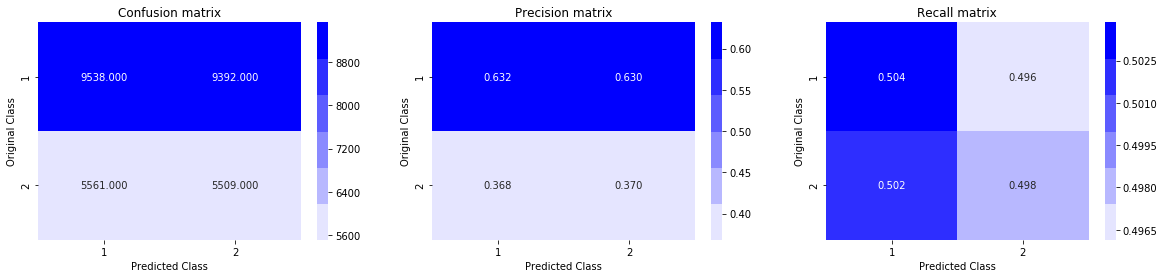

In [52]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2>  Logistic Regression with hyperparameter tuning </h2>

After standardizing data and using class_weight attribute as balanced

For values of alpha =  1e-05 The log loss is: 0.5548572238861242
For values of alpha =  0.0001 The log loss is: 0.555218088514174
For values of alpha =  0.001 The log loss is: 0.5561838982884916
For values of alpha =  0.01 The log loss is: 0.5480702092220857
For values of alpha =  0.1 The log loss is: 0.47047399227007386
For values of alpha =  1 The log loss is: 0.45259783675789717
For values of alpha =  10 The log loss is: 0.45843136608096174


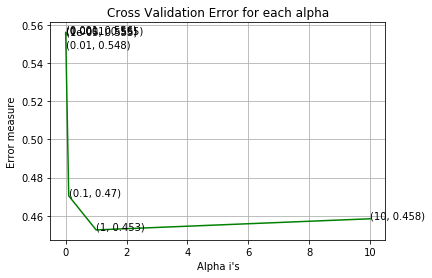

For values of best alpha =  1 The train log loss is: 0.33369087759811605
For values of best alpha =  1 The test log loss is: 0.45259783675789717
Total number of data points : 30000


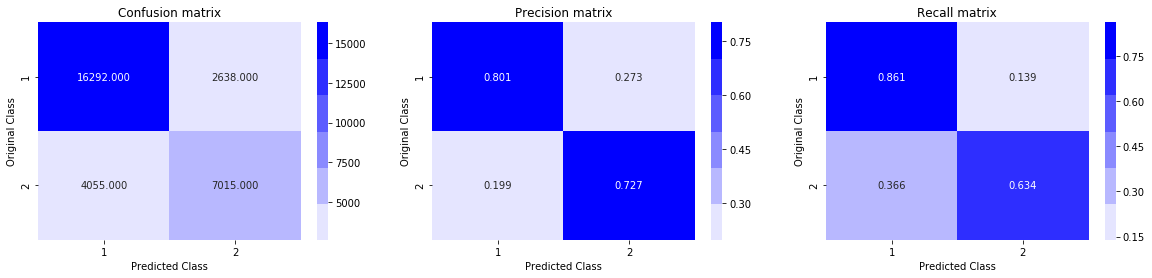

In [53]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

train_scores = []
test_scores = []
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight="balanced",alpha=i, penalty='l2', loss='log',random_state=42)
    clf.fit(X_train_std, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_std, y_train)
    predict_y = sig_clf.predict_proba(X_test_std)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    train_scores.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
    test_scores.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], class_weight="balanced", penalty='l2', loss='log',random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_std, y_train)

predict_y = sig_clf.predict_proba(X_train_std)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_std)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Text(0,0.5,'Log Loss')

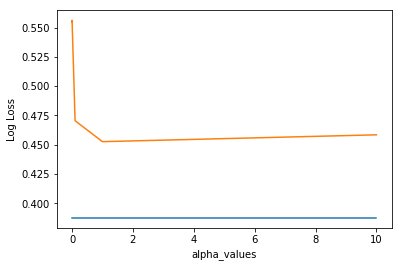

In [55]:
plt.plot(alpha,train_scores,label='Train log loss')
plt.plot(alpha,test_scores,label='Test log loss')
plt.xlabel('alpha_values')
plt.ylabel('Log Loss')

# Logistic Regression with n_iterations as 1000

For values of alpha =  1e-05 The log loss is: 0.5729229668862297
For values of alpha =  0.0001 The log loss is: 0.548785780971361
For values of alpha =  0.001 The log loss is: 0.5194630939892373
For values of alpha =  0.01 The log loss is: 0.4873344460190807
For values of alpha =  0.1 The log loss is: 0.4591399822046703
For values of alpha =  1 The log loss is: 0.45181760994537035
For values of alpha =  10 The log loss is: 0.45818468828396747


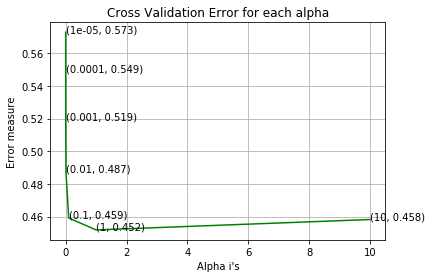

For values of best alpha =  1 The train log loss is: 0.3370390116246404
For values of best alpha =  1 The test log loss is: 0.45181760994537035
Total number of data points : 30000


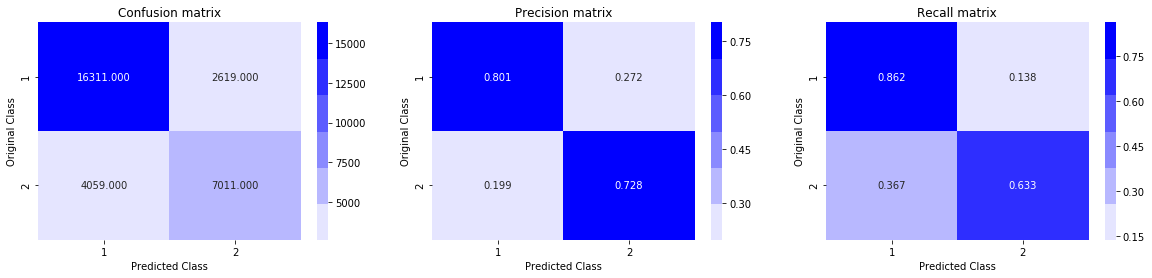

In [56]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

test_scores = []
train_scores = []
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight="balanced",alpha=i, penalty='l2', n_iter = 1000,loss='log',random_state=42)
    clf.fit(X_train_std, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_std, y_train)
    predict_y_train = sig_clf.predict_proba(X_train_std)
    predict_y = sig_clf.predict_proba(X_test_std)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    train_scores.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
    test_scores.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], class_weight="balanced", penalty='l2', n_iter = 1000,loss='log',random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_std, y_train)

predict_y = sig_clf.predict_proba(X_train_std)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_std)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Text(0,0.5,'Log Loss')

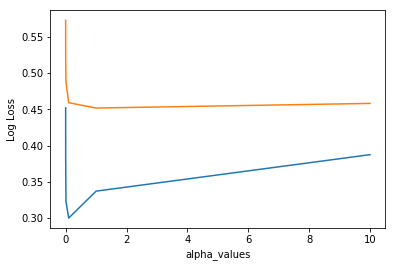

In [57]:
plt.plot(alpha,train_scores,label='Train log loss')
plt.plot(alpha,test_scores,label='Test log loss')
plt.xlabel('alpha_values')
plt.ylabel('Log Loss')

<h2>  Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5618619385269924
For values of alpha =  0.0001 The log loss is: 0.5704277728226442
For values of alpha =  0.001 The log loss is: 0.6042464675666533
For values of alpha =  0.01 The log loss is: 0.6496845857240381
For values of alpha =  0.1 The log loss is: 0.6567845626159721
For values of alpha =  1 The log loss is: 0.6575309102046816
For values of alpha =  10 The log loss is: 0.6583422509043965


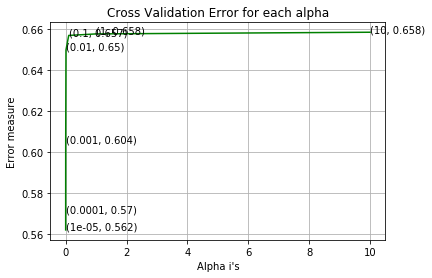

For values of best alpha =  1e-05 The train log loss is: 0.4513371880849972
For values of best alpha =  1e-05 The test log loss is: 0.5618619385269924
Total number of data points : 30000


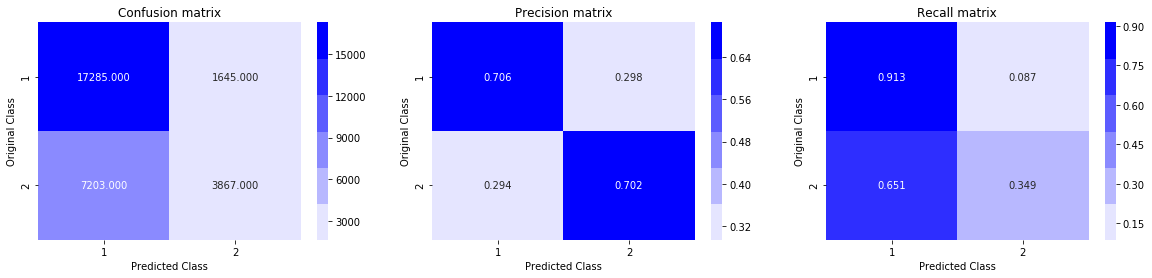

In [58]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

train_scores = []
test_scores = []
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, class_weight = "balanced",penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_std, y_train)
    predict_y = sig_clf.predict_proba(X_test_std)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    train_scores.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
    test_scores.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], class_weight = "balanced",penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_std, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_std, y_train)

predict_y = sig_clf.predict_proba(X_train_std)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_std)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Text(0,0.5,'Log Loss')

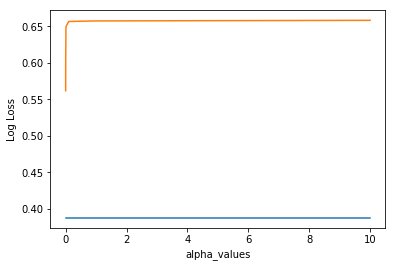

In [59]:
plt.plot(alpha,train_scores,label='Train log loss')
plt.plot(alpha,test_scores,label='Test log loss')
plt.xlabel('alpha_values')
plt.ylabel('Log Loss')

<h4>2.Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.</h4>

# XGBoost

[0]	train-logloss:0.684525	valid-logloss:0.684699
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.614834	valid-logloss:0.615216
[20]	train-logloss:0.564433	valid-logloss:0.56514
[30]	train-logloss:0.526351	valid-logloss:0.527169
[40]	train-logloss:0.497102	valid-logloss:0.498073
[50]	train-logloss:0.474289	valid-logloss:0.475494
[60]	train-logloss:0.456228	valid-logloss:0.45755
[70]	train-logloss:0.441573	valid-logloss:0.44302
[80]	train-logloss:0.429748	valid-logloss:0.431288
[90]	train-logloss:0.420007	valid-logloss:0.421699
[100]	train-logloss:0.412031	valid-logloss:0.413824
[110]	train-logloss:0.405333	valid-logloss:0.407275
[120]	train-logloss:0.399569	valid-logloss:0.401603
[130]	train-logloss:0.394733	valid-logloss:0.396758
[140]	train-logloss:0.390457	valid-logloss:0.39256
[150]	train-logloss:0.386852	valid-logloss:0.389033
[160]	train-logloss:0.38391	vali

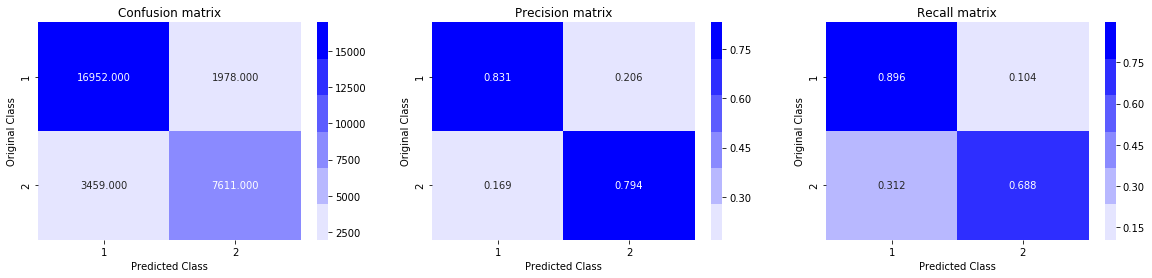

In [63]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train_std, label=y_train)
d_test = xgb.DMatrix(X_test_std, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_std,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [66]:
#Hyperparameter tuning for max_depth and min_child_weight
from sklearn.model_selection import RandomizedSearchCV
max_depth = [2,3,4,5,6,7,8,9,10]
min_child_weight = [1,2,3,4,5,6]

param_grid = {'max_depth':max_depth,'min_child_weight':min_child_weight}
#performing randomizedsearch with xgbclassifier

xgb_randomsearch = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),param_grid,verbose=10,scoring='roc_auc',n_jobs=-1)
xgb_randomsearch.fit(X_train_std,y_train)
print(xgb_randomsearch.best_estimator_)
print("="*50)
print(xgb_randomsearch.best_params_)
print("="*50)
print(xgb_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 64.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 99.7min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 112.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
{'min_child_weight': 6, 'max_depth': 10}
0.9186965308987733


In [67]:
learning_rate = [0.1,0.2,0.3]
subsample = [0.6,0.7,0.8,0.9]
colsample_bytree= [0.6,0.7,0.8,0.9]

param_grid = {'subsample':subsample,'colsample_bytree':colsample_bytree,'learning_rate':learning_rate}
#performing randomizedsearch with xgbclassifier

xgb_randomsearch = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),param_grid,verbose=10,scoring='roc_auc',n_jobs=-1)
xgb_randomsearch.fit(X_train_std,y_train)

print(xgb_randomsearch.best_estimator_)
print("="*50)
print(xgb_randomsearch.best_params_)
print("="*50)
print(xgb_randomsearch.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 32.5min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.1min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eval_metric='logloss', gamma=0,
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)
{'subsample': 0.9, 'learning_rate': 0.3, 'colsample_bytree': 0.6}
0.9148698909043144


In [69]:
gamma = [0.0,0.1,0.2,0.3,0.4]
reg_alpha = [0,0.001,0.005,0.01,0.05]
param_grid = {'gamma':gamma,'reg_alpha':reg_alpha}
#performing randomizedsearch with xgbclassifier

xgb_randomsearch = RandomizedSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),param_grid,verbose=10,scoring='roc_auc',n_jobs=-1)
xgb_randomsearch.fit(X_train,y_train)

print(xgb_randomsearch.best_estimator_)
print("="*50)
print(xgb_randomsearch.best_params_)
print("="*50)
print(xgb_randomsearch.best_score_) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 88.9min remaining:  9.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 93.2min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='logloss', gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
{'reg_alpha': 0.05, 'gamma': 0.1}
0.9056856456791387


[0]	train-logloss:0.561644	valid-logloss:0.566682
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.323468	valid-logloss:0.35311
[20]	train-logloss:0.30212	valid-logloss:0.341002
[30]	train-logloss:0.294589	valid-logloss:0.338737
[40]	train-logloss:0.283803	valid-logloss:0.335114
[50]	train-logloss:0.278343	valid-logloss:0.333739
[60]	train-logloss:0.273618	valid-logloss:0.332962
[70]	train-logloss:0.269363	valid-logloss:0.332059
[80]	train-logloss:0.26506	valid-logloss:0.331281
[90]	train-logloss:0.261409	valid-logloss:0.331296
[100]	train-logloss:0.258572	valid-logloss:0.331105
[110]	train-logloss:0.254597	valid-logloss:0.330646
[120]	train-logloss:0.251728	valid-logloss:0.330593
[130]	train-logloss:0.248989	valid-logloss:0.330417
[140]	train-logloss:0.246682	valid-logloss:0.330457
[150]	train-logloss:0.242618	valid-logloss:0.330513
Stopping. Best iteration:
[135]

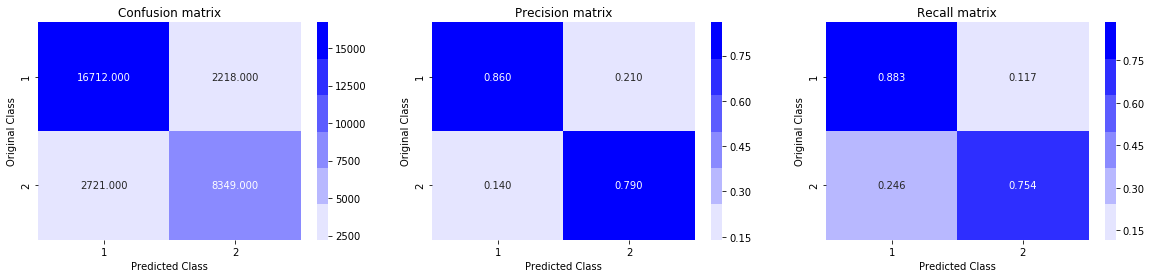

In [70]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 10
params['min_child_weight'] = 6
params['subsample'] = 0.9
params['learning_rate'] = 0.3
params['colsample_bytree'] = 0.6
params['gamma'] = 0.1
params['reg_alpha'] = 0.05

d_train = xgb.DMatrix(X_train_std, label=y_train)
d_test = xgb.DMatrix(X_test_std, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_std,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [73]:
from prettytable import PrettyTable
x = PrettyTable()
print("For Question1 and Question2 text review applying TF-IDF Vectorizer and performing Logistic Regression,Linear-SVM and XGBoost")
x.add_column("Vectorizer",["TF-IDT","TF-IDT","TF-IDT","TF-IDT","TF-IDT"])
x.add_column("Model",["Logistic Regression","Logistic Regression with n_iter=1000","Linear-SVM","Xgboost without Hyperparameters","Xgboost with Hyperparameters"])
x.add_column("Log-loss",["0.452","0.451","0.561","0.36","0.33"])
print(x)

For Question1 and Question2 text review applying TF-IDF Vectorizer and performing Logistic Regression,Linear-SVM and XGBoost
+------------+--------------------------------------+----------+
| Vectorizer |                Model                 | Log-loss |
+------------+--------------------------------------+----------+
|   TF-IDT   |         Logistic Regression          |  0.452   |
|   TF-IDT   | Logistic Regression with n_iter=1000 |  0.451   |
|   TF-IDT   |              Linear-SVM              |  0.561   |
|   TF-IDT   |   Xgboost without Hyperparameters    |   0.36   |
|   TF-IDT   |     Xgboost with Hyperparameters     |   0.33   |
+------------+--------------------------------------+----------+
